In [4]:
#Integrantes:
# Marcelo Pedral Mota - 202200014355
# Matheus Araujo Pereira - 202100114080
# Gabriel Teixeira Silveira - 202100011987

import pandas as pd # type: ignore
import os

csv_path = os.path.join("data/dataset.csv")
discentes = pd.read_csv(csv_path)
discentes.head()

,curriculum_id,student_id,centro,department_name,course_name,student_age_at_initial_period,birthday,birth_place,ingress_form,locks_number,...,optative_ch_progress,curriculum_status,leaving_reason,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
0,122,97,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,30,1964-05-14,PORTO ALEGRE/RS,TRANSFERÊNCIA COMPULSÓRIA,0,...,100.0,CANCELADO,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO,1.79,4.537049,0.300,0.476704,0.300,0.530138,0.1611
1,215,167,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1980-05-11,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.69,4.537049,0.300,0.476704,0.367,0.530138,0.7366
2,348,285,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,19,1983-10-26,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.66,4.537049,0.300,0.476704,0.446,0.530138,0.8911
3,352,289,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,21,1981-08-08,RIO DE JANEIRO/RJ,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.71,4.537049,0.300,0.476704,0.411,0.530138,0.8273
4,414,351,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1986-02-10,ARACAJU/SE,VESTIBULAR,0,...,100.0,CONCLUÍDO,CONCLUÍDO,6.55,4.537049,0.325,0.476704,0.429,0.530138,0.9132


array([[<Axes: title={'center': 'curriculum_id'}>,
        <Axes: title={'center': 'student_id'}>,
        <Axes: title={'center': 'student_age_at_initial_period'}>,
        <Axes: title={'center': 'locks_number'}>],
       [<Axes: title={'center': 'required_ch_progress'}>,
        <Axes: title={'center': 'optative_ch_progress'}>,
        <Axes: title={'center': 'mc'}>,
        <Axes: title={'center': 'course_mc'}>],
       [<Axes: title={'center': 'iepl'}>,
        <Axes: title={'center': 'course_iepl'}>,
        <Axes: title={'center': 'iech'}>,
        <Axes: title={'center': 'course_iech'}>],
       [<Axes: title={'center': 'iea'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

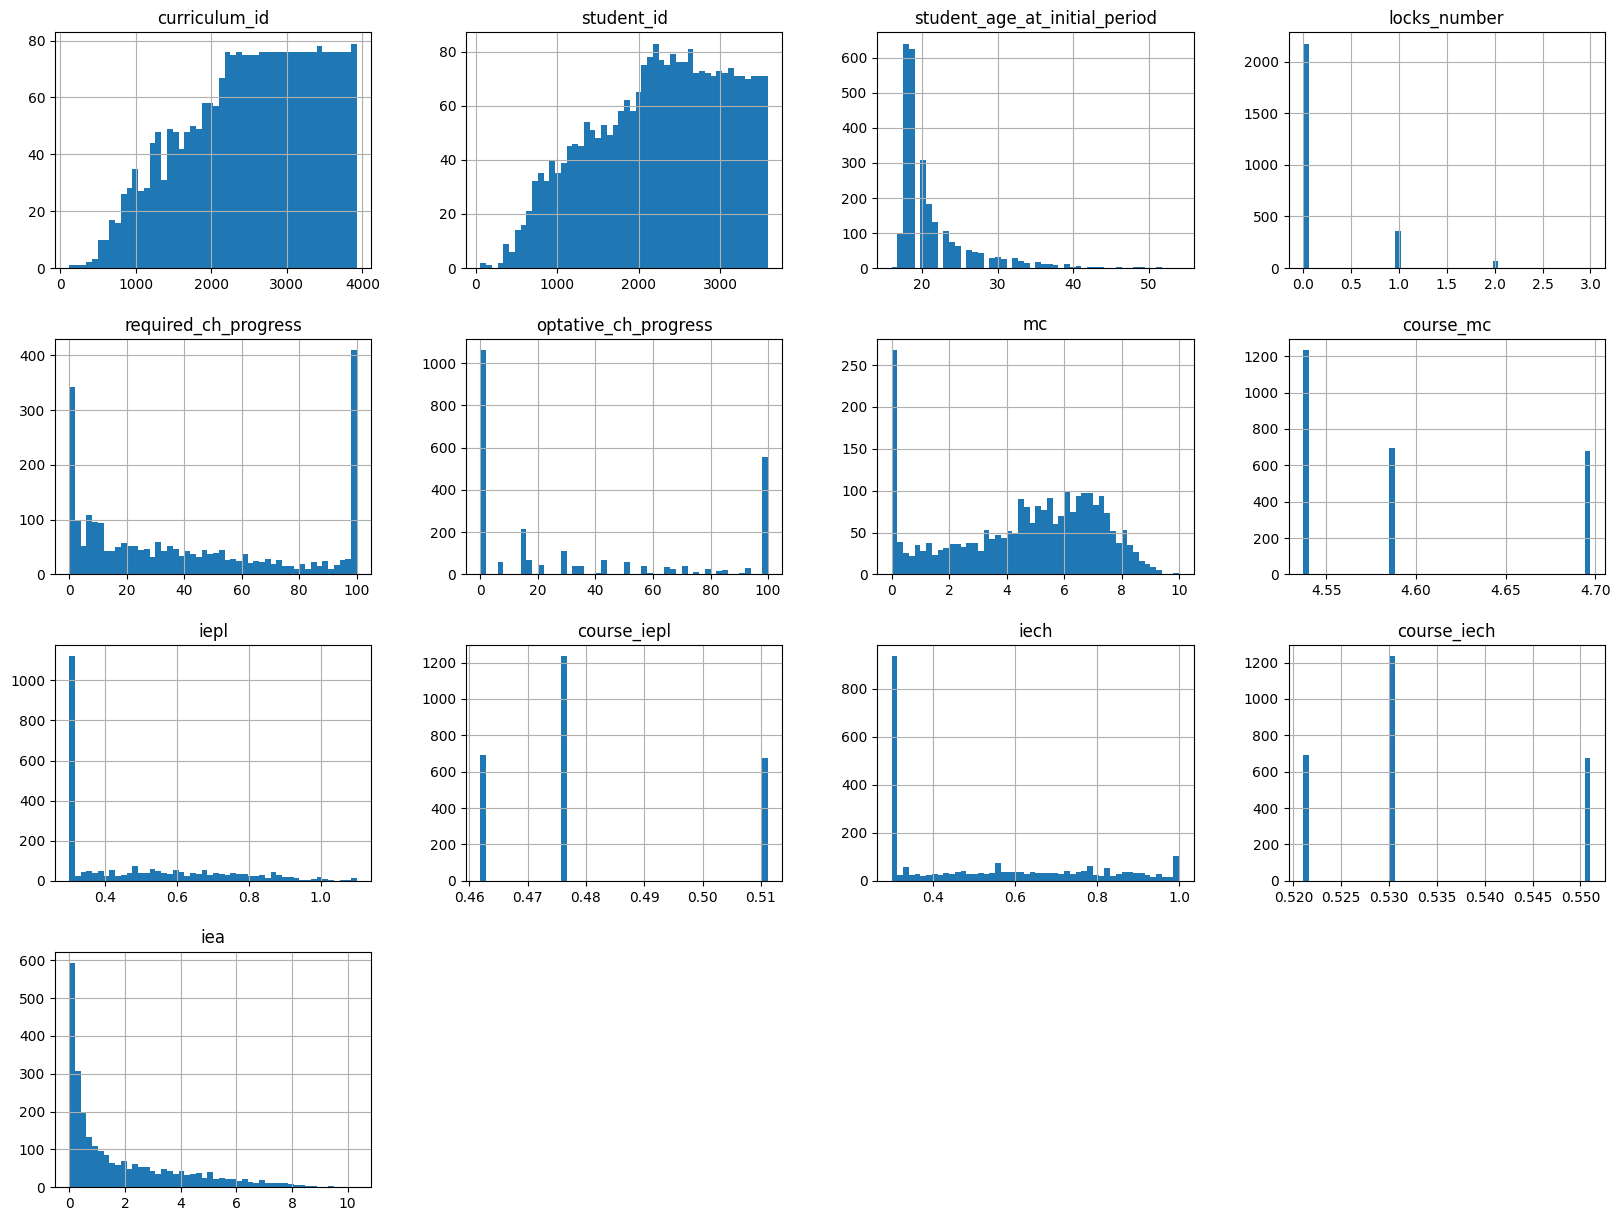

In [ ]:
import matplotlib.pyplot as plt # type: ignore
# Histograma de todas as colunas numéricas de discentes 
discentes.hist(bins=50, figsize=(20,15))

In [40]:
# Agora, vou remover colunas que acredito que não são relevantes para meu modelo

discentes_reduzido = discentes.drop(['curriculum_id', 'student_id', 'centro', 'department_name', 
'course_iepl', 'course_mc','birth_place', 'course_iech', 'birthday'], axis=1)

# Decidi juntar as cargas horarias obrigatórias e optativas em uma só coluna, para simplificar o modelo
discentes_reduzido['ch_progress'] = (discentes_reduzido['optative_ch_progress'] + 
                                     discentes_reduzido['required_ch_progress'])/200
discentes_reduzido = discentes_reduzido.drop(['optative_ch_progress', 'required_ch_progress'], axis=1)

# Decidi considerar os curriculum_status 'FORMANDOS', 'Ano/Período Letivo Inicial:' e 'Índices Acadêmicos' em 'CONCLUIDO' 
mapeamento = {
    'FORMANDO': 'CONCLUIDO',
    'CONCLUÍDO': 'CONCLUIDO',
    'Ano/Período Letivo Inicial:': 'CONCLUIDO',
    'Índices Acadêmicos': 'CONCLUIDO'
}
discentes_reduzido['curriculum_status'] = discentes_reduzido['curriculum_status'].replace(mapeamento)

mapeamento = {
    'CONCLUÍDO': 'CONCLUIDO',
    'Transferência Interna': 'ABANDONO',   
    'CANC.. NOVO VESTIBULAR': 'ABANDONO',  
    'CANCELAMENTO ESPONTÂNEO': 'ABANDONO', 
    'TRANSF.P/OUTRA IES': 'ABANDONO',      
    'CADASTRO CANCELADO': 'ABANDONO',      
    'NÃO CONFIRMAÇÃO VÍNCULO': 'ABANDONO', 
    'DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO': 'ABANDONO',
    'Não atendeu à convocação para o Cadastro Específico conforme Edital 21/2017/PROGRAD': 'ABANDONO'

}
# print(discentes['leaving_reason'].value_counts())
discentes_reduzido['leaving_reason'] = discentes_reduzido['leaving_reason'].replace(mapeamento)


# Decidi desconsiderar discentes com curriculum_status 'TRANCADO' pois não há como dizer se estão ATIVOS, CONCLUIDOS ou CANCELADOS
discentes_reduzido = discentes_reduzido[discentes_reduzido['curriculum_status'] != 'TRANCADO']
# print(discentes_reduzido.columns)
# discentes_reduzido.hist(bins=50, figsize=(20,15))
print('\n',discentes_reduzido['curriculum_status'].value_counts())

filtered_df = discentes_reduzido[(discentes_reduzido['curriculum_status'] == 'CONCLUIDO') & 
                                 (discentes_reduzido['leaving_reason'] != 'CONCLUIDO') & 
                                 (discentes_reduzido['leaving_reason'] != 'ABANDONO')]
discentes_reduzido.loc[
    (discentes_reduzido['curriculum_status'] == 'CONCLUIDO') & 
    (discentes_reduzido['leaving_reason'] != 'CONCLUIDO') & 
    (discentes_reduzido['leaving_reason'] != 'ABANDONO'), 
    'leaving_reason'
] = 'CONCLUIDO'
print('\n',discentes_reduzido['leaving_reason'].value_counts())




 curriculum_status
CANCELADO    1188
ATIVO        1004
CONCLUIDO     350
Name: count, dtype: int64

 leaving_reason
ABANDONO     1188
CONCLUIDO     350
Name: count, dtype: int64


In [ ]:
# O Sklearn tambem tem uma função que cria um test set e um training set
from sklearn.model_selection import train_test_split # type: ignore
train_set2, test_set2 = train_test_split(discentes, test_size=0.2, random_state=42)
print(len(train_set2))
print(len(test_set2))

Index(['course_name', 'student_age_at_initial_period', 'ingress_form',
       'locks_number', 'curriculum_status', 'leaving_reason', 'mc', 'iepl',
       'iech', 'iea', 'ch_progress'],
      dtype='object')


,course_name,student_age_at_initial_period,ingress_form,locks_number,curriculum_status,leaving_reason,mc,iepl,iech,iea,ch_progress
0,CIÊNCIA DA COMPUTAÇÃO,30,TRANSFERÊNCIA COMPULSÓRIA,0,CANCELADO,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO,1.79,0.300,0.300,0.1611,0.730263
1,CIÊNCIA DA COMPUTAÇÃO,18,VESTIBULAR,0,CANCELADO,ABANDONO,6.69,0.300,0.367,0.7366,0.976744
2,CIÊNCIA DA COMPUTAÇÃO,19,VESTIBULAR,0,CANCELADO,ABANDONO,6.66,0.300,0.446,0.8911,0.988372
3,CIÊNCIA DA COMPUTAÇÃO,21,VESTIBULAR,0,CANCELADO,ABANDONO,6.71,0.300,0.411,0.8273,1.000000
4,CIÊNCIA DA COMPUTAÇÃO,18,VESTIBULAR,0,CONCLUÍDO,CONCLUÍDO,6.55,0.325,0.429,0.9132,1.000000


Index(['course_name', 'student_age_at_initial_period', 'ingress_form',
       'locks_number', 'curriculum_status', 'leaving_reason', 'mc', 'iepl',
       'iech', 'iea', 'ch_progress'],
      dtype='object')


array([[<Axes: title={'center': 'course_name'}>,
        <Axes: title={'center': 'student_age_at_initial_period'}>,
        <Axes: title={'center': 'ingress_form'}>],
       [<Axes: title={'center': 'locks_number'}>,
        <Axes: title={'center': 'curriculum_status'}>,
        <Axes: title={'center': 'leaving_reason'}>],
       [<Axes: title={'center': 'mc'}>, <Axes: title={'center': 'iepl'}>,
        <Axes: title={'center': 'iech'}>],
       [<Axes: title={'center': 'iea'}>,
        <Axes: title={'center': 'ch_progress'}>, <Axes: >]], dtype=object)

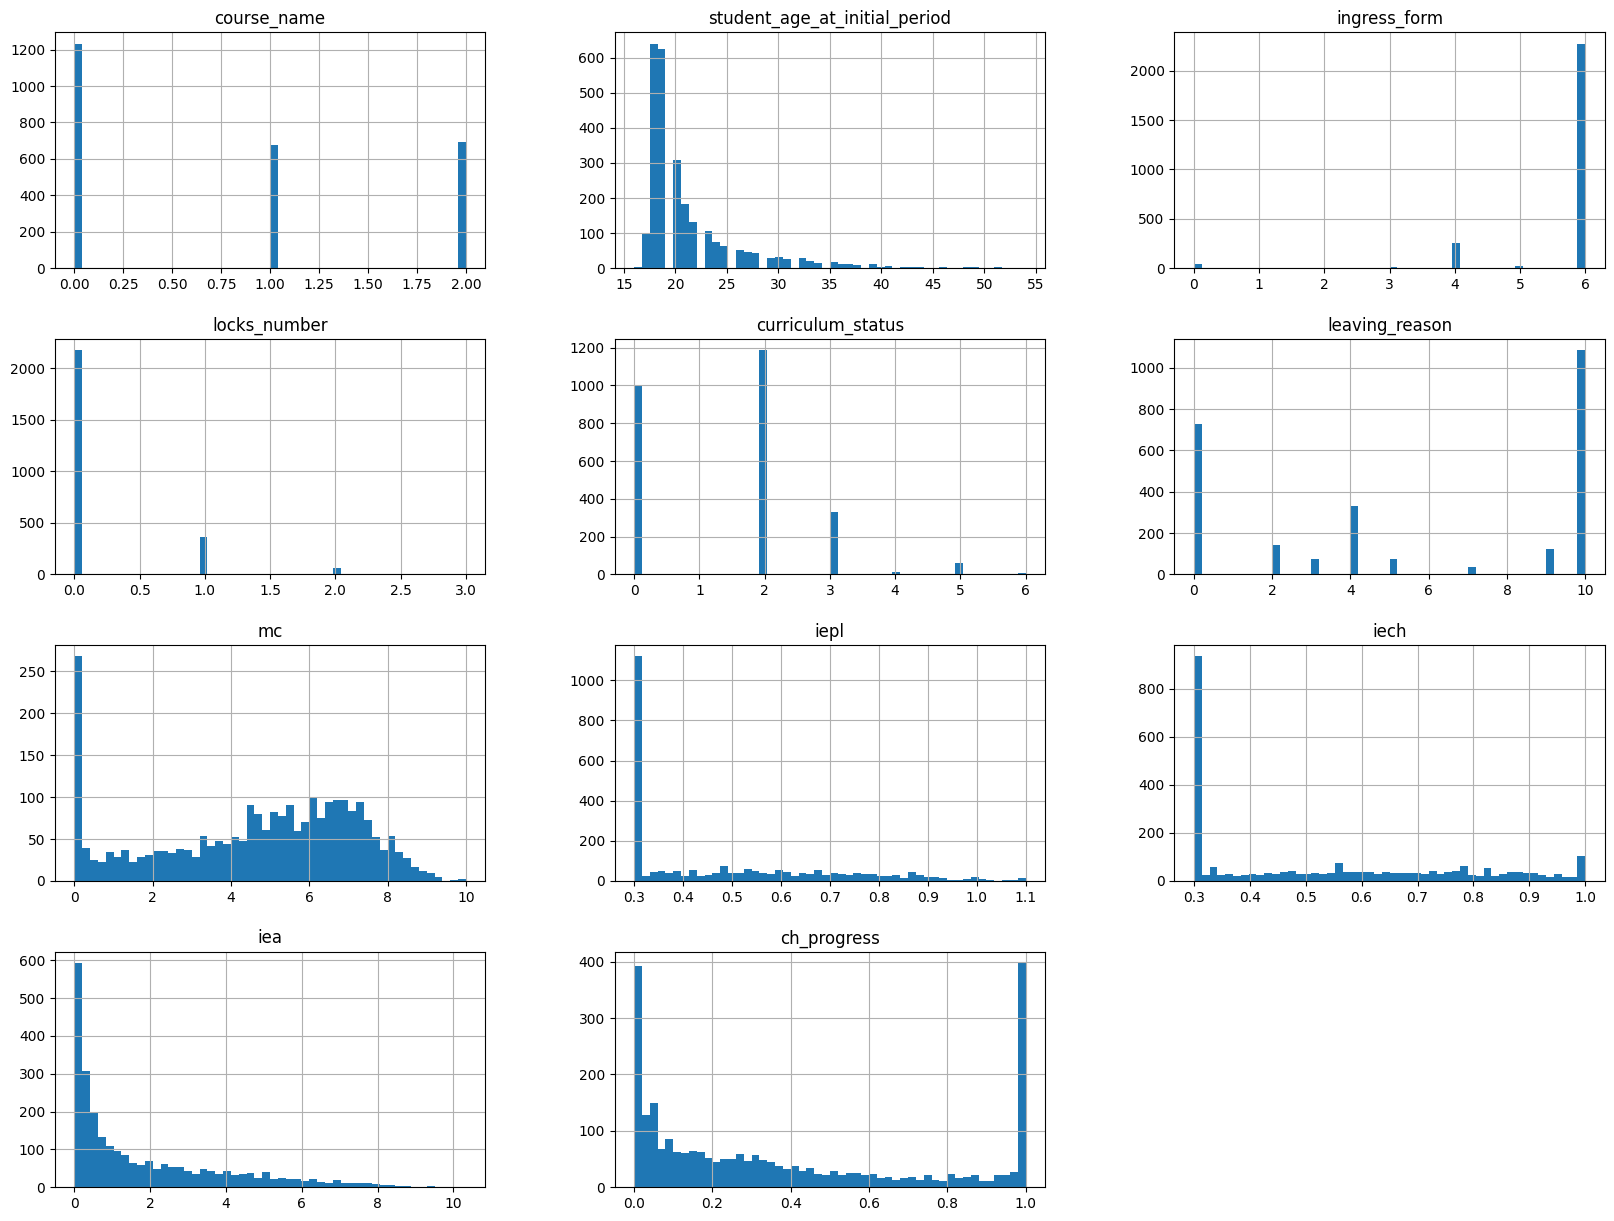

In [17]:
from sklearn.preprocessing import LabelEncoder # type: ignore

# Transformando colunas strings em numéricos
label_encoders = {}
for column in ['course_name', 'ingress_form', 'curriculum_status', 'leaving_reason']:
    le = LabelEncoder()
    discentes_reduzido[column] = le.fit_transform(discentes_reduzido[column])
    label_encoders[column] = le

print(discentes_reduzido.columns)
discentes_reduzido.hist(bins=50, figsize=(20,15))